Data Science Tools 
Constructor University Bremen
By: Leonardo Corredor

First contacts to work with de Data Set
(Week 1)

Below is my Jupiter study notebook for the R data science tools course. Here you will find most of the concepts seen in class applied to the Flights13 dataset along with the assignments proposed in the course at the end of each week.

LOAD DATA AND CREATE SUBSET (NOVEMBER FLIGHTS)

In [1]:
#Load the main packages to use.

library(tidyverse)
library(nycflights13)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [2]:
#Loading Data and Creating Subset: Flights of november
?flights
flights_nov <- flights %>%
  filter (month==11)

In [3]:
#Check of Size of the Subset
glimpse(flights_nov)

Rows: 27,268
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 5, 35, 455, 539, 542, 549, 550, 554, 554, 554, 555, 555…
$ sched_dep_time <int> 2359, 2250, 500, 545, 545, 600, 600, 600, 600, 600, 600…
$ dep_delay      <dbl> 6, 105, -5, -6, -3, -11, -10, -6, -6, -6, -5, -5, -5, -…
$ arr_time       <int> 352, 123, 641, 856, 831, 912, 705, 659, 826, 749, 847, …
$ sched_arr_time <int> 345, 2356, 651, 827, 855, 923, 659, 701, 827, 751, 854,…
$ arr_delay      <dbl> 7, 87, -10, 29, -24, -11, 6, -2, -1, -2, -7, -7, -14, -…
$ carrier        <chr> "B6", "B6", "US", "UA", "AA", "UA", "US", "US", "DL", "…
$ flight         <int> 745, 1816, 1895, 1714, 2243, 303, 2167, 2134, 563, 731,…
$ tailnum        <chr> "N568JB", "N353JB", "N192UW", "N38727", "N5CLAA", "N595…
$ origin       

DATA TYPES: TYPEOF() AND CLASS()

In [4]:
#Checking the types of the Data Variables
typeof(flights_nov$dep_time)


In [5]:
#Checking the class of the Data Variables
typeof(flights_nov$arr_delay)
class(flights_nov$arr_delay)

[1] "numeric"

METRIC VARIABLES: INTEGER VS NUMERIC (DOUBLE)

In [6]:
#Metric Variables
as.numeric(1/3)
typeof(as.numeric(1 / 3))

[1] "double"

MISSING VALUES (NA) AND SPECIAL VALUES

In [7]:
#MISSING VALUES (NA) AND SPECIAL VALUES
#Getting the sumary of values of the variable Departure Time
summary (flights_nov$dep_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1     910    1356    1344    1733    2400     233 

In [8]:
#Number of NA values in dep_time
sum(is.na(flights_nov$dep_time))

[1] 233

In [9]:
#NA counted per column
colSums(is.na(flights_nov))

          year          month            day       dep_time sched_dep_time 
             0              0              0            233              0 
     dep_delay       arr_time sched_arr_time      arr_delay        carrier 
           233            253              0            297              0 
        flight        tailnum         origin           dest       air_time 
             0             73              0              0            297 
      distance           hour         minute      time_hour 
             0              0              0              0 

In [10]:
#Checking for infinite values for the variable Air Time
#There is not any
summary(is.infinite(flights_nov$air_time))

   Mode   FALSE 
logical   27268 

In [11]:
#Checking for NaN values for the variable Air Time
#There is not any
summary(is.nan(flights_nov$air_time))

   Mode   FALSE 
logical   27268 

CATEGORICAL VARIABLES AND FACTORS

In [12]:
#CATERGORICAL VARIABLES AND FACTORS
#Summary of the Origin Airports
table(flights_nov$origin)


 EWR  JFK  LGA 
9707 8710 8851 

In [13]:
typeof(flights_nov$origin)

[1] "character"

In [14]:
origin_factor <- as.factor(flights_nov$origin)


In [15]:
typeof(origin_factor)

[1] "integer"

In [16]:
class(origin_factor)

[1] "factor"

Dates and Times: Excercises with variables time_hour and wday

In [17]:
#Dates and Times: Excercises with variables time_hour and wday
#Showing head of variable time_hour
print(head(flights_nov$time_hour))



[1] "2013-11-01 23:00:00 EDT" "2013-11-01 22:00:00 EDT"
[3] "2013-11-01 05:00:00 EDT" "2013-11-01 05:00:00 EDT"
[5] "2013-11-01 05:00:00 EDT" "2013-11-01 06:00:00 EDT"


In [18]:
#Type of variable time_hour
typeof(flights_nov$time_hour)

[1] "double"

In [19]:
#Dates and Times: Excercises with variables time_hour and wday
#Showing head of variable time_hour
print(head(flights_nov$day))

[1] 1 1 1 1 1 1


In [20]:
#Weekday as an ordered factor with labels (Sun, Mon, etc.)
weekday_factor <- wday(flights_nov$time_hour, label = TRUE)

In [21]:
table(weekday_factor)

weekday_factor
  So   Mo   Di   Mi   Do   Fr   Sa 
3589 3888 3902 3940 3613 4617 3719 

In [22]:
class(weekday_factor)

[1] "ordered" "factor" 

In [23]:
#Turning Week Days into numeric values (1-7)
weekday_numeric <-wday(flights_nov$time_hour, label = FALSE)

In [24]:
table (weekday_numeric)

weekday_numeric
   1    2    3    4    5    6    7 
3589 3888 3902 3940 3613 4617 3719 

In [25]:
class(weekday_numeric)

[1] "numeric"

SCATTER PLOTS: TWO METRIC VARIABLES

Warning message:
Removed 297 rows containing missing values or values outside the scale range
(`geom_point()`). 


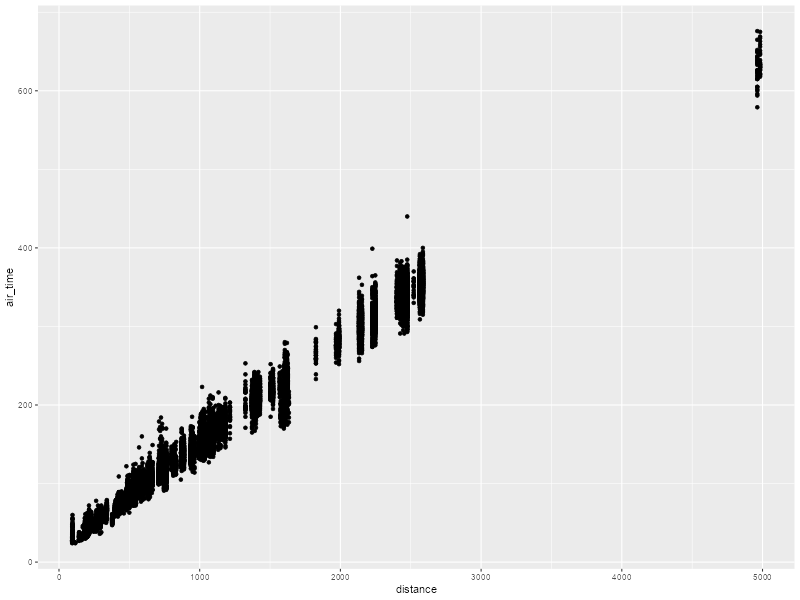

In [26]:
#Scter Plot: Distance vs. air_time
flights_nov%>%
  ggplot (mapping = aes(x =distance, y =air_time)) +
geom_point()

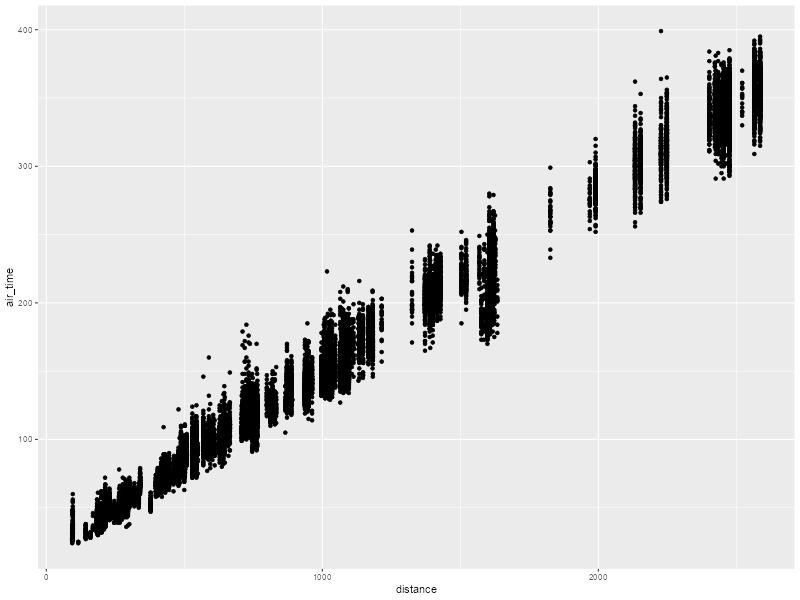

In [27]:
#Removing missing values and restricting to resanoable range to zoom
flights_nov%>%
  filter(!is.na(distance),
         !is.na(air_time),
         distance < 3000,
        air_time < 400) %>%
  ggplot(mapping =aes (x = distance, y = air_time)) +
  geom_point()

ADDING A THIRD VARIABLE IN SCATTER PLOTS: COLOR, ALPHA, SIZE, SHAPE

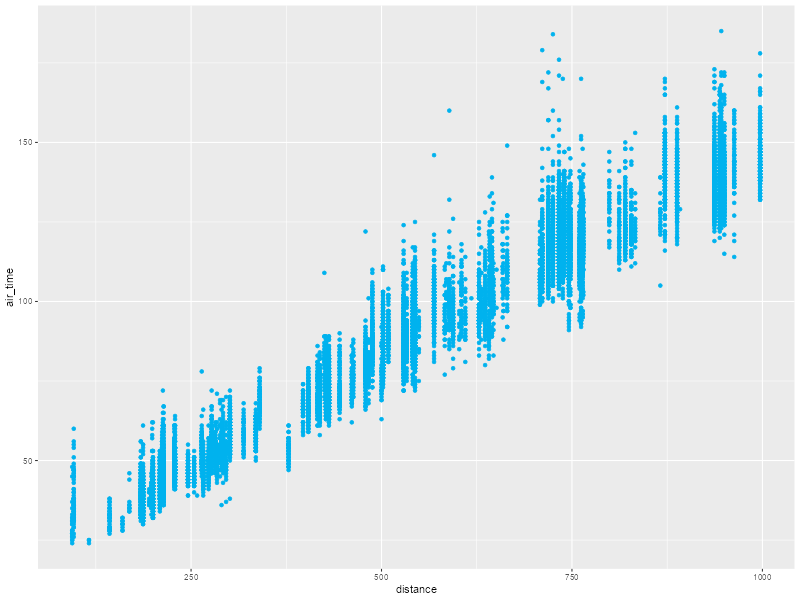

In [28]:
#Adding a fixed color for all points
flights_nov %>%
  filter(!is.na(distance),
         !is.na(air_time),
         distance < 1000,
         air_time < 200) %>%
  ggplot(mapping = aes(x = distance, y = air_time)) +
  geom_point(color = "deepskyblue2")

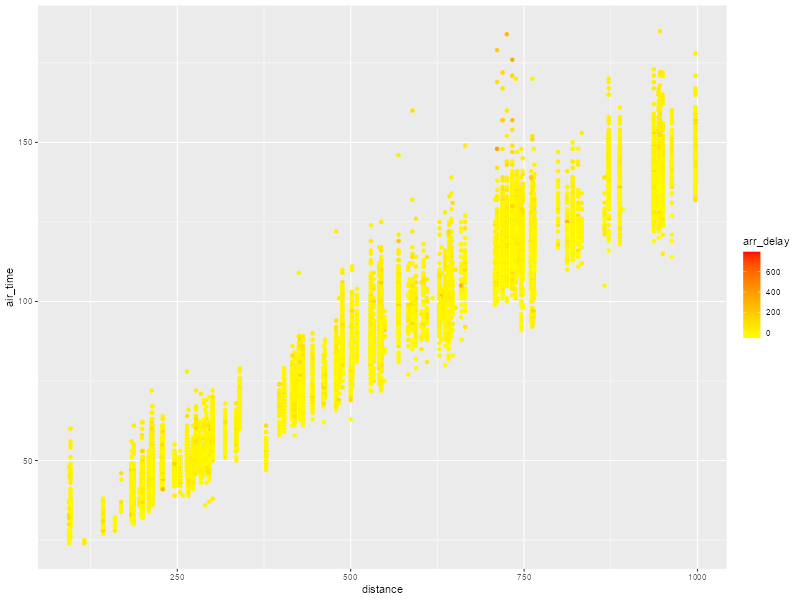

In [29]:
#Color mapped to a metric adding variable arr_delay with gradient
flights_nov %>%
  filter(!is.na(distance),
         !is.na(air_time),
         !is.na(arr_delay),
         distance < 1000,
         air_time < 200) %>%
  ggplot(mapping = aes(x = distance, y = air_time,
                       color = arr_delay)) +
  geom_point() +
  scale_color_gradient(low = "yellow", high = "red")

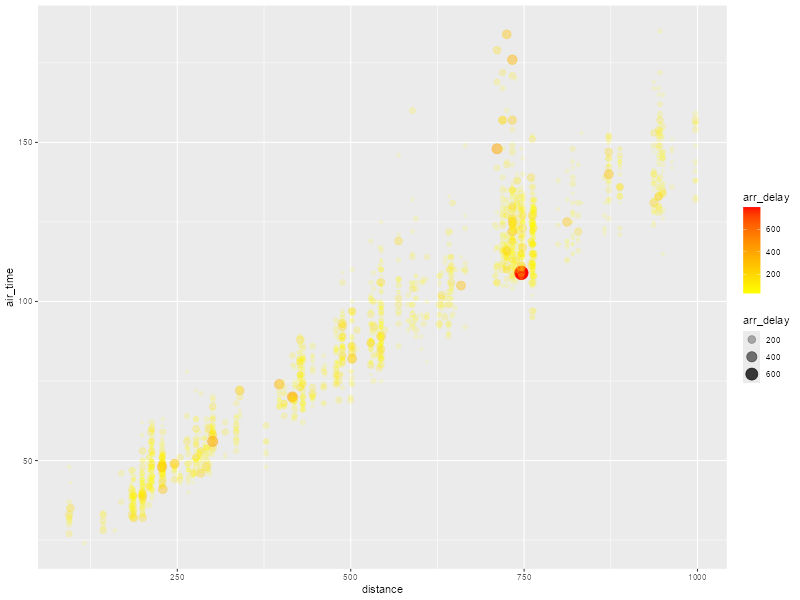

In [30]:
#Highlight flights with arrival delay > 30 using color, alpha, and size
flights_nov %>%
  filter(!is.na(distance),
         !is.na(air_time),
         !is.na(arr_delay),
         distance < 1000,
         air_time < 200,
         arr_delay > 30) %>%
  ggplot(mapping = aes(x = distance, y = air_time,
                       color = arr_delay,
                       alpha = arr_delay,
                       size  = arr_delay)) +
  geom_point() +
  scale_color_gradient(low = "yellow", high = "red")


Warning messages:
1: No shared levels found between `names(values)` of the manual scale and the
data's colour values. 
2: No shared levels found between `names(values)` of the manual scale and the
data's colour values. 


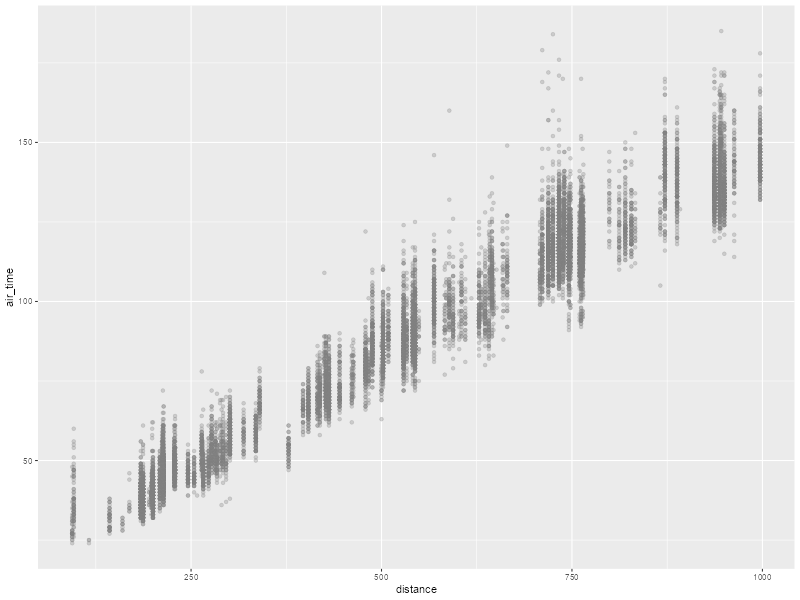

In [31]:
# 8.4 Color by weekday with manual colors
flights_nov %>%
  filter(!is.na(distance),
         !is.na(air_time),
         distance < 1000,
         air_time < 200) %>%
  ggplot(mapping = aes(x = distance, y = air_time,
                       color = wday(time_hour, label = TRUE))) +
  geom_point(alpha = 0.3) +
  scale_color_manual(values = c("Sun" = "darkred",
                                "Mon" = "red",
                                "Tue" = "orange",
                                "Wed" = "yellow",
                                "Thu" = "greenyellow",
                                "Fri" = "green3",
                                "Sat" = "blue"))

Important: Changing the colors for the visualization

Warning messages:
1: No shared levels found between `names(values)` of the manual scale and the
data's fill values. 
2: No shared levels found between `names(values)` of the manual scale and the
data's fill values. 


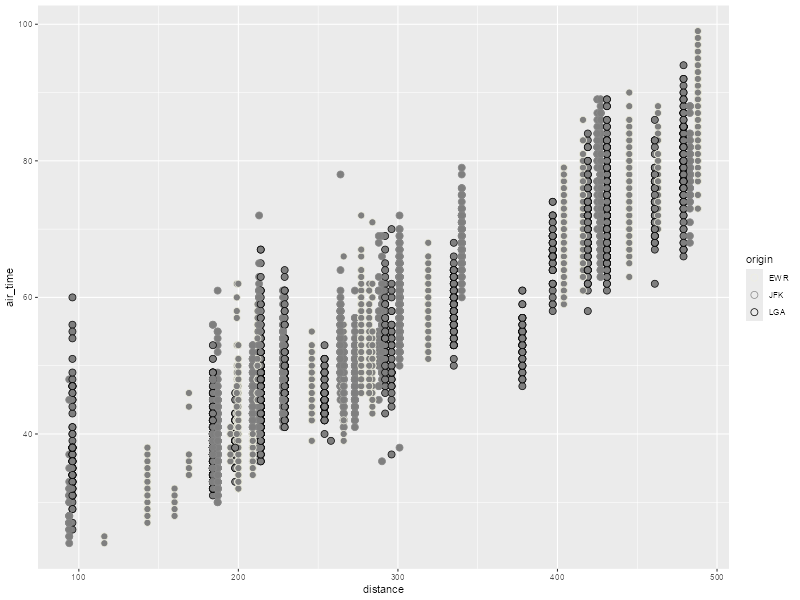

In [32]:
# Adding border color to the points by origin
flights_nov %>%
  filter(!is.na(distance),
         !is.na(air_time),
         distance < 500,
         air_time < 100) %>%
  ggplot(mapping = aes(x = distance, y = air_time,
                       color = origin,
                       fill  = wday(time_hour, label = TRUE))) +
  geom_point(shape = 21, size = 3) +
  scale_fill_manual(values = c("Sun" = "darkred",
                               "Mon" = "red",
                               "Tue" = "orange",
                               "Wed" = "yellow",
                               "Thu" = "greenyellow",
                               "Fri" = "green3",
                               "Sat" = "blue")) +
  scale_color_manual(values = c("EWR" = "ivory2",
                                "JFK" = "grey53",
                                "LGA" = "black"))


Important: Changing the colors for the visualization

REGRESSION LINES WITH geom_smooth()

In [33]:
# Filter to focus on flights with dep_delay and arr_delay between 30 and 120 mintes
#Creating a subset for those delays
delays_subset <- flights_nov %>%
  filter(!is.na(dep_delay),
         !is.na(arr_delay),
         arr_delay > 30, dep_delay > 30,
         arr_delay < 120, dep_delay < 120)


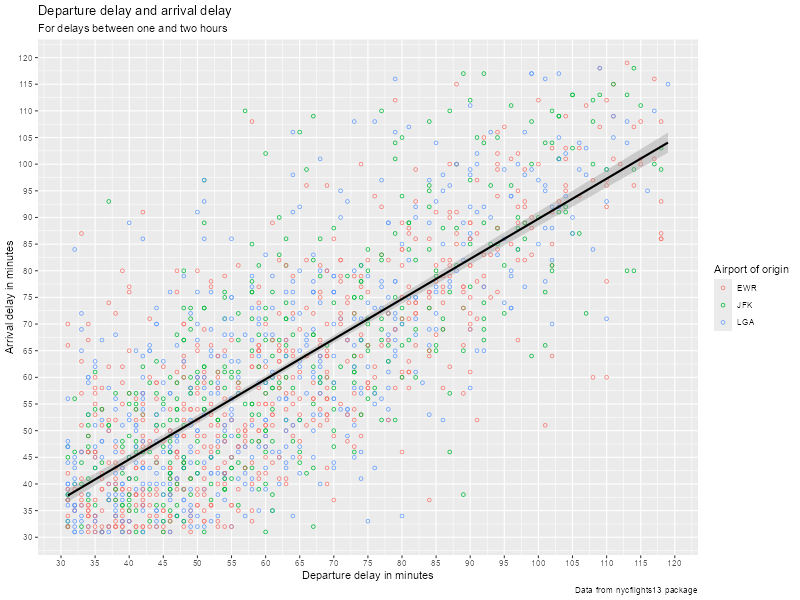

In [34]:
# Plot for Delays Subset with titles, subtitles, labels, scales
delays_subset %>%
  ggplot() +
  geom_point(mapping = aes(x = dep_delay,
                           y = arr_delay,
                           color = origin),
             shape = 1) +
  geom_smooth(mapping = aes(x = dep_delay, y = arr_delay),
              formula = y ~ x,
              method  = "lm",
              color   = "black",
              se      = TRUE) +
  labs(title    = "Departure delay and arrival delay",
       subtitle = "For delays between one and two hours",
       caption  = "Data from nycflights13 package",
       x = "Departure delay in minutes",
       y = "Arrival delay in minutes",
       color = "Airport of origin") +
  scale_x_continuous(breaks = seq(30, 120, by = 5)) +
  scale_y_continuous(breaks = seq(30, 120, by = 5))

HISTOGRAM: ONE METRIC VARIABLE

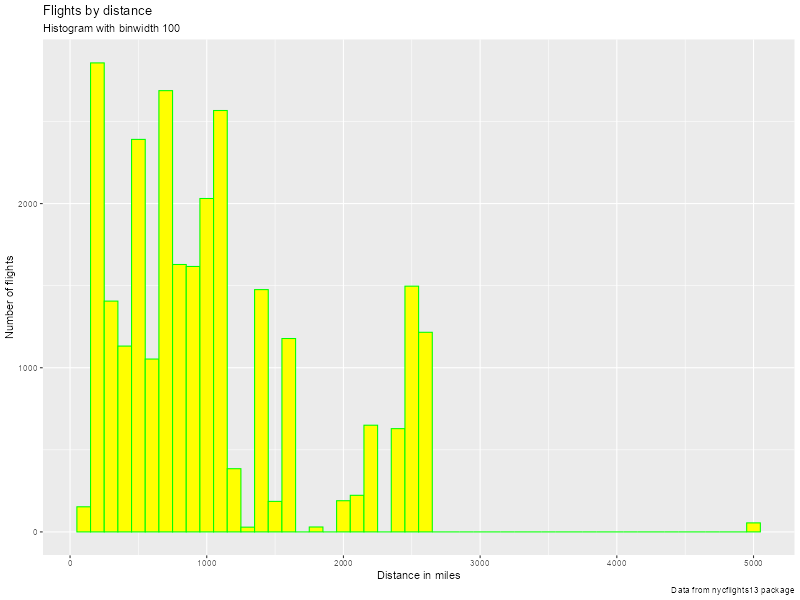

In [35]:
#Histogram of distance for flights in February (month == 2).
flights %>%
  filter(month == 11) %>%
  ggplot() +
  geom_histogram(mapping = aes(x = distance),
                 binwidth = 100,
                 fill  = "yellow",
                 color = "green") +
  labs(title    = "Flights by distance",
       subtitle = "Histogram with binwidth 100",
       caption  = "Data from nycflights13 package",
       x = "Distance in miles",
       y = "Number of flights")
#binwidth: "Millas por hora" in Spanish

BOXPLOT: ONE METRIC VARIABLE

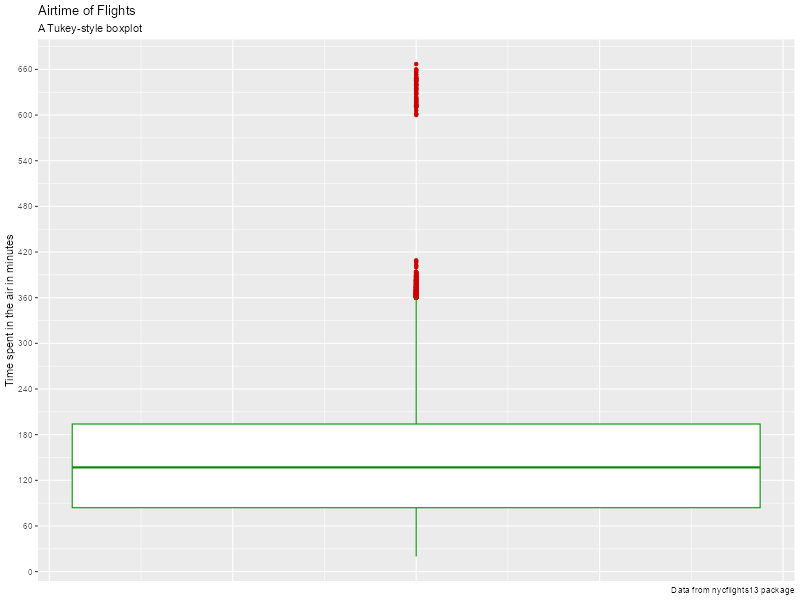

In [36]:
#Boxplot of air_time in Novmber, removing infinite values
flights %>%
  filter(month == 1, is.finite(air_time)) %>%
  ggplot(mapping = aes(y = air_time)) +
  geom_boxplot(color         = "green4",
               outlier.color = "red3") +
  labs(title    = "Airtime of Flights",
       subtitle = "A Tukey-style boxplot",
       caption  = "Data from nycflights13 package",
       y = "Time spent in the air in minutes") +
  theme(axis.title.x = element_blank(),
        axis.text.x  = element_blank(),
        axis.ticks.x = element_blank()) +
  scale_y_continuous(breaks = seq(0, 700, by = 60))

BAR PLOTS: ONE CATEGORICAL VARIABLE

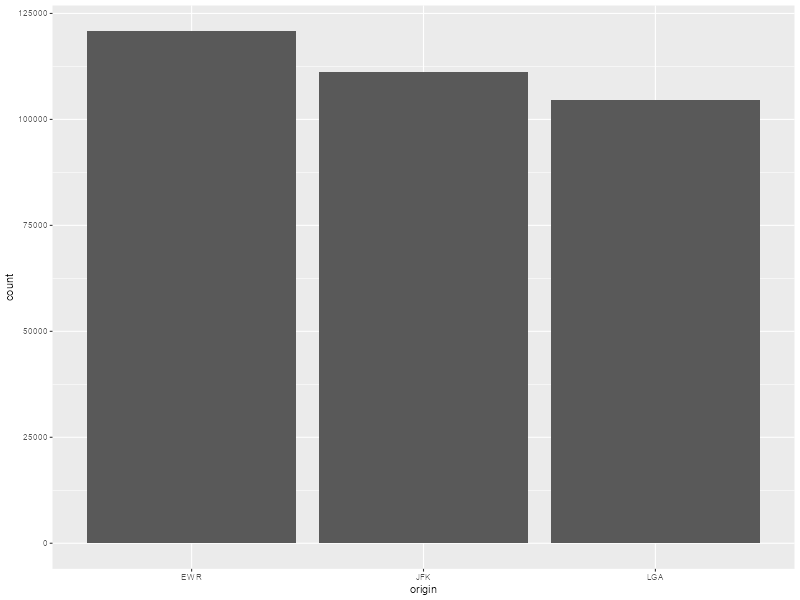

In [37]:
# Count flights by origin airport.
ggplot(data = flights, mapping = aes(x = origin)) +
  geom_bar()

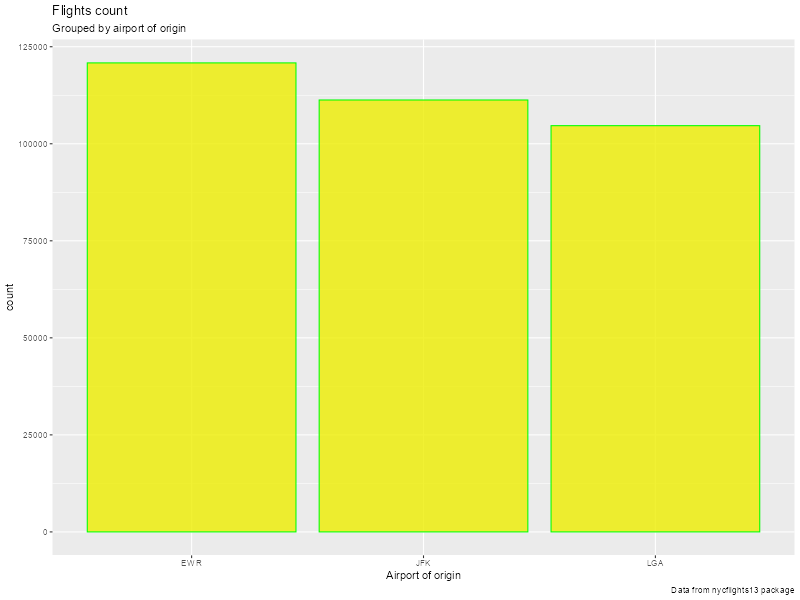

In [38]:
#Personalizd Bar  Plot
ggplot(data = flights) +
  geom_bar(aes(x = origin),
           alpha = 0.8,
           fill  = "yellow2",
           color = "green1") +
  labs(title    = "Flights count",
       subtitle = "Grouped by airport of origin",
       caption  = "Data from nycflights13 package",
       x = "Airport of origin")

BOXPLOTS BY GROUP: ONE CATEGORICAL + ONE METRIC

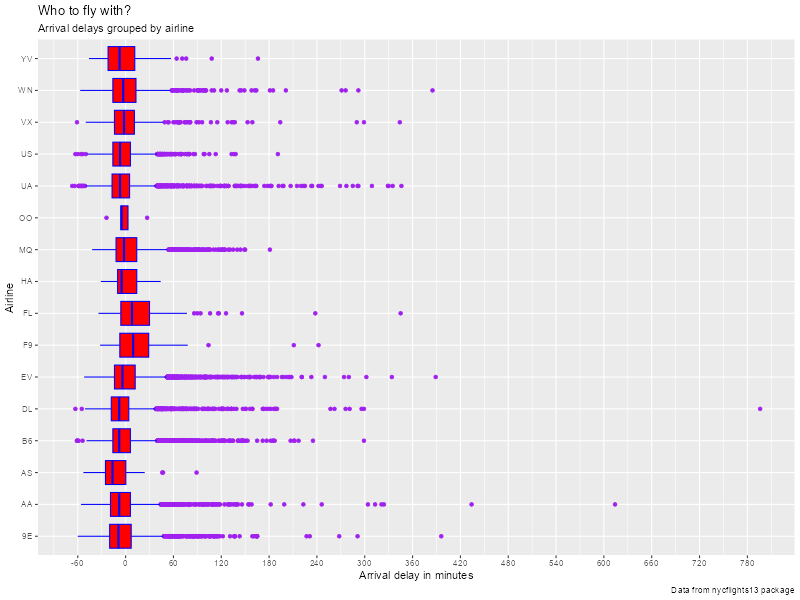

In [39]:
# BoxplotArrival delays by carrier in November 

flights %>%
  filter(month == 11, is.finite(arr_delay)) %>%
  ggplot() +
  geom_boxplot(mapping = aes(x = carrier, y = arr_delay),
               fill           = "red",
               color          = "blue",
               outlier.colour = "purple") +
  labs(title    = "Who to fly with?",
       subtitle = "Arrival delays grouped by airline",
       caption  = "Data from nycflights13 package",
       x = "Airline",
       y = "Arrival delay in minutes") +
  scale_y_continuous(breaks = seq(-120, 900, by = 60)) +
  coord_flip()


HISTOGRAM WITH CATEGORICAL FILL

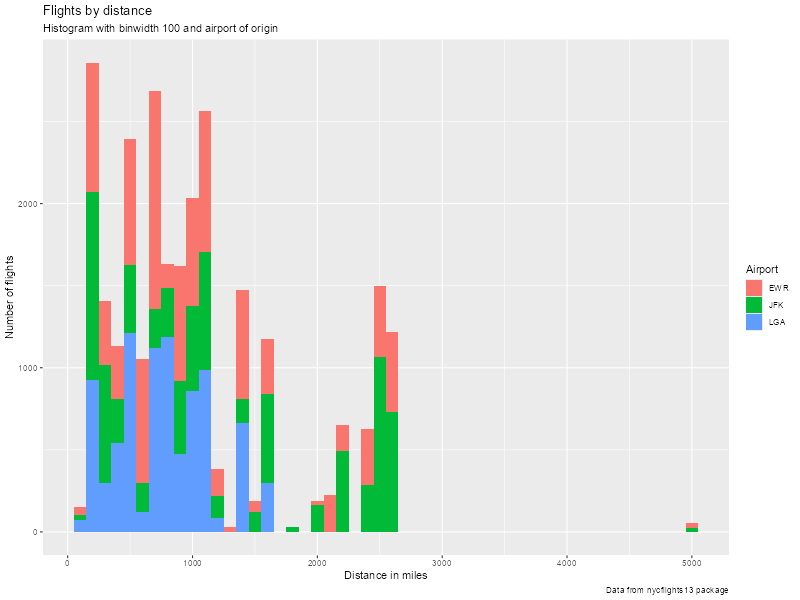

In [40]:
#Distance histogram colored by origin airport.
flights %>%
  filter(month == 11) %>%
  ggplot() +
  geom_histogram(mapping = aes(x = distance, fill = origin),
                 binwidth = 100) +
  labs(title    = "Flights by distance",
       subtitle = "Histogram with binwidth 100 and airport of origin",
       caption  = "Data from nycflights13 package",
       x = "Distance in miles",
       y = "Number of flights",
       fill = "Airport")

BAR PLOT OF SUMMARY VALUES (AVERAGE DELAY BY CARRIER)

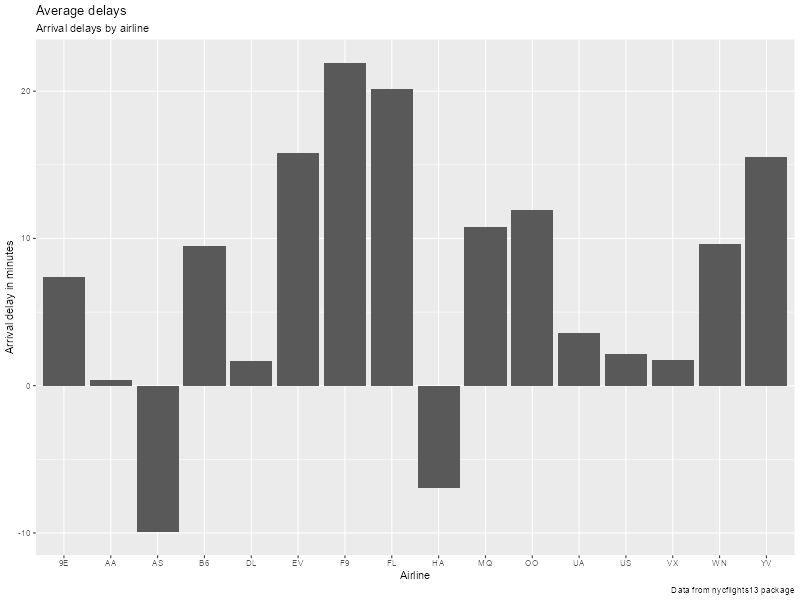

In [41]:
#Group by average arrival delay by carrier.
flights %>%
  group_by(carrier) %>%
  summarise(average_delay = mean(arr_delay, na.rm = TRUE)) %>%
  ggplot(mapping = aes(x = carrier, y = average_delay)) +
  geom_col() +
  labs(title    = "Average delays",
       subtitle = "Arrival delays by airline",
       caption  = "Data from nycflights13 package",
       x = "Airline",
       y = "Arrival delay in minutes") +
  scale_y_continuous(breaks = seq(-10, 30, by = 10))

TWO CATEGORICAL VARIABLES IN BAR PLOTS

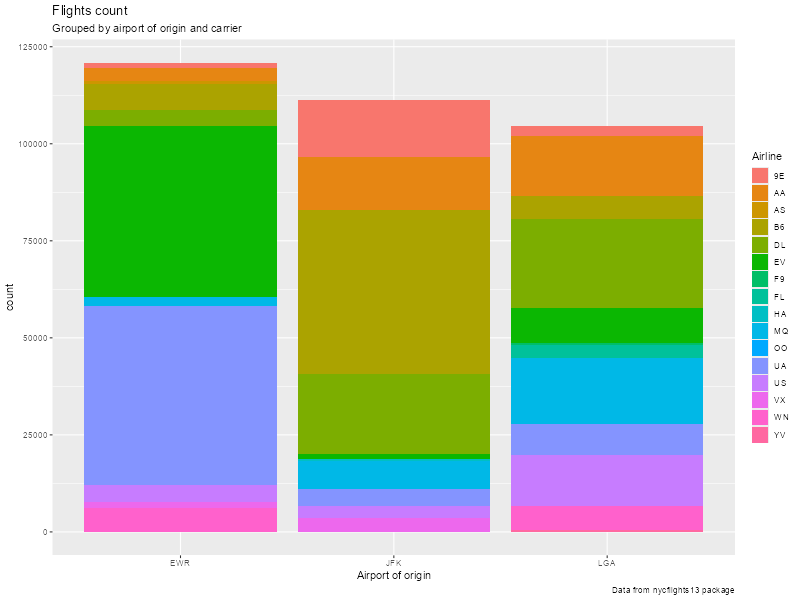

In [42]:
# Counts by origin, airline and carrier
ggplot(data = flights) +
  geom_bar(aes(x = origin, fill = carrier)) +
  labs(title    = "Flights count",
       subtitle = "Grouped by airport of origin and carrier",
       caption  = "Data from nycflights13 package",
       x = "Airport of origin",
       fill = "Airline")#Que miercoles tan versatil esta cosa


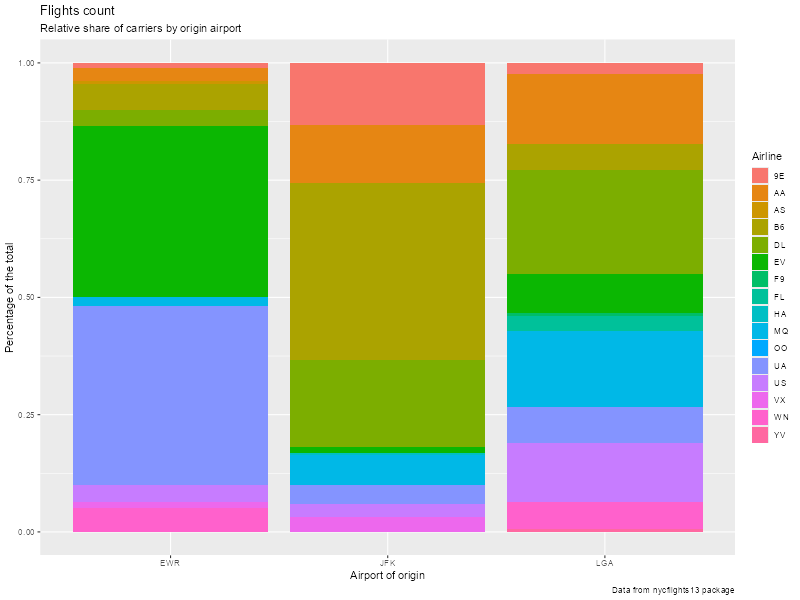

In [43]:
# Relative proportions by origin 
ggplot(data = flights) +
  geom_bar(aes(x = origin, fill = carrier),
           position = "fill") +
  labs(title    = "Flights count",
       subtitle = "Relative share of carriers by origin airport",
       caption  = "Data from nycflights13 package",
       x = "Airport of origin",
       y = "Percentage of the total",
       fill = "Airline")

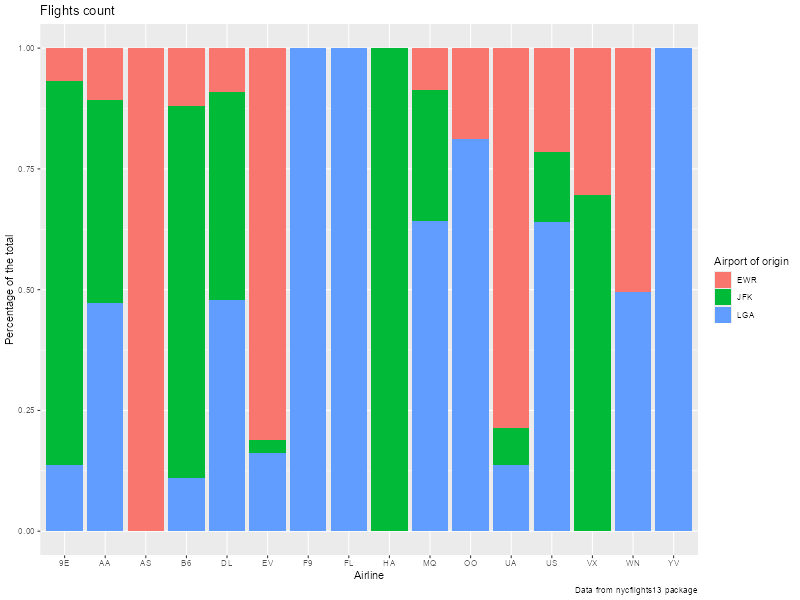

In [44]:
#Swaping axes: carrier on x
ggplot(data = flights) +
  geom_bar(aes(x = carrier, fill = origin),
           position = "fill") +
  labs(title    = "Flights count",
       caption  = "Data from nycflights13 package",
       x = "Airline",
       y = "Percentage of the total",
       fill = "Airport of origin")

DATA STRUCTURES & DATA WRANGLING
(Week 2)

CREATING AND INSPECTING DATA FRAMES

In [45]:
# Creating a simple data frame with variables: Year, Month, and Value.
df <- data.frame(
  Year  = c(2020, 2021, 2022),
  Month = c(1, 2, 3),
  Value = c(10.5, 20.5, 30.5)
)

In [46]:
# Checking structure and first rows.
str(df)
head(df)


'data.frame':	3 obs. of  3 variables:
 $ Year : num  2020 2021 2022
 $ Month: num  1 2 3
 $ Value: num  10.5 20.5 30.5


TIDYVERSE DATA WRANGLING

In [47]:
# FILTER – select rows by condition
january_flights <- flights %>%
  filter(month == 1, day == 1)  

In [48]:
# SELECT – chose specific columns
selected_data <- flights %>%
  select(year, month, day, dep_time, arr_time)

In [49]:
#ARRANGE – sort rows
sorted_flights <- flights %>%
  arrange(desc(dep_delay))  

In [50]:
# MUTATE – create new columns
# New Variable: difference between scheduled and actual departure time
flights_mutated <- flights %>%
  mutate(dep_delay_minutes = dep_time - sched_dep_time)

In [51]:
#GROUP BY + SUMMARISE – grouped summaries
mean_delay_by_origin <- flights %>%
  group_by(origin) %>%
  summarise(
    mean_departure_delay = mean(dep_delay, na.rm = TRUE)
  )


HANDLING MISSING DATA (NA)

In [52]:
#Number of missing values in dep_delay
missing_dep_delay <- sum(is.na(flights$dep_delay))

In [53]:
# Overview of missing values in all columns
missing_summary <- flights %>%
  summarise_all(~ sum(is.na(.)))

missing_dep_delay
missing_summary

# A tibble: 1 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <int>    <int>          <int>
1     0     0     0     8255              0      8255     8713              0
# ℹ 11 more variables: arr_delay <int>, carrier <int>, flight <int>,
#   tailnum <int>, origin <int>, dest <int>, air_time <int>, distance <int>,
#   hour <int>, minute <int>, time_hour <int>

PIVOTING DATA: LONG ↔ WIDE

In [54]:
# Pivot_wider – One row per origin, One column per month
# una fila para origen, una columna para mes
flights_counts <- flights_nov %>%
  count(origin, month)
flights_pivot <- flights_counts %>%
  pivot_wider(
    names_from  = month,  #los valores de month son nombres de columna
    values_from = n       #los conteos se ponen en las celdas
  )
head(flights_pivot)

# A tibble: 3 × 2
  origin  `11`
  <chr>  <int>
1 EWR     9707
2 JFK     8710
3 LGA     8851

In [55]:
# pivot_longer – back to long format
flights_long <- flights_pivot %>%
  pivot_longer(
    cols = -origin,                
    names_to  = "month",
    values_to = "flights"
  )
print(pivot_longer)

function (data, cols, ..., cols_vary = "fastest", names_to = "name", 
    names_prefix = NULL, names_sep = NULL, names_pattern = NULL, 
    names_ptypes = NULL, names_transform = NULL, names_repair = "check_unique", 
    values_to = "value", values_drop_na = FALSE, values_ptypes = NULL, 
    values_transform = NULL) 
{
    check_dots_used()
    UseMethod("pivot_longer")
}
<bytecode: 0x000001c2c32e0470>
<environment: namespace:tidyr>


RELATIONAL DATA: JOINS

In [56]:
#Airports dataset from nycflights13 has airport details.
?airports
head(airports)

# A tibble: 6 × 8
  faa   name                             lat   lon   alt    tz dst   tzone      
  <chr> <chr>                          <dbl> <dbl> <dbl> <dbl> <chr> <chr>      
1 04G   Lansdowne Airport               41.1 -80.6  1044    -5 A     America/Ne…
2 06A   Moton Field Municipal Airport   32.5 -85.7   264    -6 A     America/Ch…
3 06C   Schaumburg Regional             42.0 -88.1   801    -6 A     America/Ch…
4 06N   Randall Airport                 41.4 -74.4   523    -5 A     America/Ne…
5 09J   Jekyll Island Airport           31.1 -81.4    11    -5 A     America/Ne…
6 0A9   Elizabethton Municipal Airport  36.4 -82.2  1593    -5 A     America/Ne…

In [57]:
#Proper join – match flights$origin with airports
#Empareja ambos data sets
flights_with_airports <- flights %>%
  left_join(airports, by = c("origin" = "faa"))

#Revisar la estructura de los datos unidos.
str(flights_with_airports)

tibble [336,776 × 26] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

HOMEWORK – ACTIVITY 1: DATA MANIPULATION PRACTICE

1. Create a new variable for total delay

In [58]:
# New Variable: total_delay defined as dep_delay + arr_delay.
flights_hw1 <- flights %>%
  mutate(total_delay = dep_delay + arr_delay)

2. Filter flights that departed after 8 AM.

In [59]:
# Filter flights that departed after 8 AM
# dep_time is in HHMM format; 0800 = 8 AM
flights_hw1_after_8 <- flights_hw1 %>%
  filter(dep_time > 0800)

3. Arrange by arrival delay in descending order.

In [60]:
#Arrange by arrival delay in descending order
flights_hw1_sorted <- flights_hw1_after_8 %>%
  arrange(desc(arr_delay))


4. Summarise average delay by origin airport.

In [61]:
# Summary of average delay by origin airport
hw1_avg_delay_by_origin <- flights_hw1 %>%
  group_by(origin) %>%
  summarise(
    avg_total_delay = mean(total_delay, na.rm = TRUE)
  )


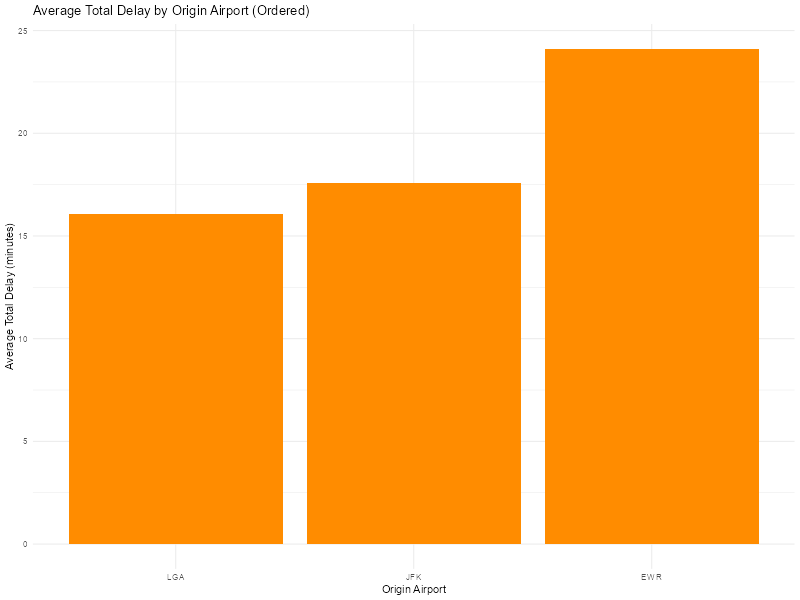

In [62]:
#Barplot Average total delay by origin
ggplot(hw1_avg_delay_by_origin, aes(x = reorder(origin, avg_total_delay), y = avg_total_delay)) +
  geom_col(fill = "darkorange") +
  labs(
    title = "Average Total Delay by Origin Airport (Ordered)",
    x = "Origin Airport",
    y = "Average Total Delay (minutes)"
  ) +
  theme_minimal()

HOMEWORK – ACTIVITY 2: PIVOTING EXERCISE

1. Frequency table – number of flights per month for each origin.

In [63]:
hw2_counts <- flights %>%
  count(origin, month)  # columns: origin, month

#Pivoteo a formato ancho – una fila por origin, una columna por mes.
hw2_wide <- hw2_counts %>%
  pivot_wider(
    names_from  = month,
    values_from = n
  )
print (hw2_wide)

# A tibble: 3 × 13
  origin   `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`   `9`  `10`  `11`  `12`
  <chr>  <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
1 EWR     9893  9107 10420 10531 10592 10175 10475 10359  9550 10104  9707  9922
2 JFK     9161  8421  9697  9218  9397  9472 10023  9983  8908  9143  8710  9146
3 LGA     7950  7423  8717  8581  8807  8596  8927  8985  9116  9642  8851  9067


HOMEWORK - ACTIVITY 3: RELATIONAL DATA TASK

Merge flights with airports to add airport details.

In [64]:
# EN: Merge flights with airports to add airport details
# Merge: Unir in Spanish
hw3_flights_airports <- flights %>%
  left_join(airports, by = c("origin" = "faa"))

In [65]:
#How many distinct airports in flights vs airports?
hw3_flights_airports_summary <- hw3_flights_airports %>%
  summarise(
    n_origin_codes      = n_distinct(origin),
    n_airport_codes_faa = n_distinct("faa")
  )

hw3_flights_airports_summary

# A tibble: 1 × 2
  n_origin_codes n_airport_codes_faa
           <int>               <int>
1              3                   1

WEEK 3 – DATES AND TIMES IN R

In [66]:
data("flights")
data("weather")
data("airports")
data("planes")

MAKE DATETIME FROM year, month, day, hour, minute

In [67]:
#Define a helper to combine date and time into POSIXct.
make_datetime <- function(year, month, day, hour = 0, minute = 0, second = 0) {
    #Crear POSIXct desde componentes (asumimos UTC aquí, se puede ajustar tz).
  make_date(year, month, day) + hours(hour) + minutes(minute) + seconds(second)
}

STANDARDIZING TIME VARIABLES: CREATE departure DATETIME

In [68]:
#Combine year, month, day, hour, minute into a single datetime "departure".
flights <- flights %>%
  mutate(
    departure = make_datetime(year, month, day, hour, minute)
  )
head(flights$departure)

[1] "2013-01-01 05:15:00 UTC" "2013-01-01 05:29:00 UTC"
[3] "2013-01-01 05:40:00 UTC" "2013-01-01 05:45:00 UTC"
[5] "2013-01-01 06:00:00 UTC" "2013-01-01 05:58:00 UTC"

PARSING DATES AND TIMES WITH LUBRIDATE

In [69]:
#Parse a standard ISO date (YYYY-MM-DD).
#Parse: Igualar, establecer in spanish
date_iso <- ymd("2025-02-06")


custom_date <- parse_date_time("06-Feb-2025", orders = "d-b-Y")


datetime_example <- ymd_hms("2025-02-06 14:30:00")

date_iso
custom_date
datetime_example

[1] "2025-02-06 14:30:00 UTC"

EXTRACTING COMPONENTS FROM DATETIME

In [70]:
# Use departure to derive year, month , weekday and hour.

flights <- flights %>%
  mutate(
    dep_year    = year(departure),
    dep_month   = month(departure, label = TRUE),   
    dep_weekday = wday(departure, label = TRUE),    
    dep_hour    = hour(departure)
  )


head(flights %>% select(departure, dep_year, dep_month, dep_weekday, dep_hour))

# A tibble: 6 × 5
  departure           dep_year dep_month dep_weekday dep_hour
  <dttm>                 <dbl> <ord>     <ord>          <int>
1 2013-01-01 05:15:00     2013 Jan       Di                 5
2 2013-01-01 05:29:00     2013 Jan       Di                 5
3 2013-01-01 05:40:00     2013 Jan       Di                 5
4 2013-01-01 05:45:00     2013 Jan       Di                 5
5 2013-01-01 06:00:00     2013 Jan       Di                 6
6 2013-01-01 05:58:00     2013 Jan       Di                 5

TIME ZONES: SETTING AND CONVERTING

In [71]:
#Create a datetime in New York time zone.
departure_nyc <- ymd_hms("2025-02-06 14:30:00", tz = "America/New_York")

# Convert that instant to London time.
departure_london <- with_tz(departure_nyc, "Europe/London")

departure_nyc
departure_london

[1] "2025-02-06 19:30:00 GMT"

FIXING NEGATIVE DELAYS 

In [72]:
# Treat negative departure delays as early departures
# Here  negative values are transformed by adding 1440 minutes (24 hours) if neded
flights <- flights %>%
  mutate(
    dep_delay_fixed = if_else(
      dep_delay < 0,
      dep_delay + 1440,  
      dep_delay
    )
  )

# Comparación rápida entre retrasos originales y corregidos
head(flights %>% select(dep_delay, dep_delay_fixed))

# A tibble: 6 × 2
  dep_delay dep_delay_fixed
      <dbl>           <dbl>
1         2               2
2         4               4
3         2               2
4        -1            1439
5        -6            1434
6        -4            1436

JOINING DATASETS WITH TIME-RELATED KEYS

In [73]:
# Weather has origin and time_hour, 
# which match flights$origin and flights$time_hour.

flights_weather <- flights %>%
  left_join(weather, by = c("origin", "time_hour"))


#airports tiene faa (código) que coincide con flights$origin.
flights_airports <- flights %>%
  left_join(airports, by = c("origin" = "faa"))

str(flights_weather)
str(flights_airports)

tibble [336,776 × 38] (S3: tbl_df/tbl/data.frame)
 $ year.x         : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month.x        : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day.x          : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time       : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time : int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay      : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time       : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time : int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay      : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier        : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight         : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum        : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin         : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest 

VISUALIZING TIME-BASED DATA: AVERAGE DEPARTURE DELAY BY HOUR

Warning message:
Removed 1 row containing missing values or values outside the scale range
(`geom_line()`). 


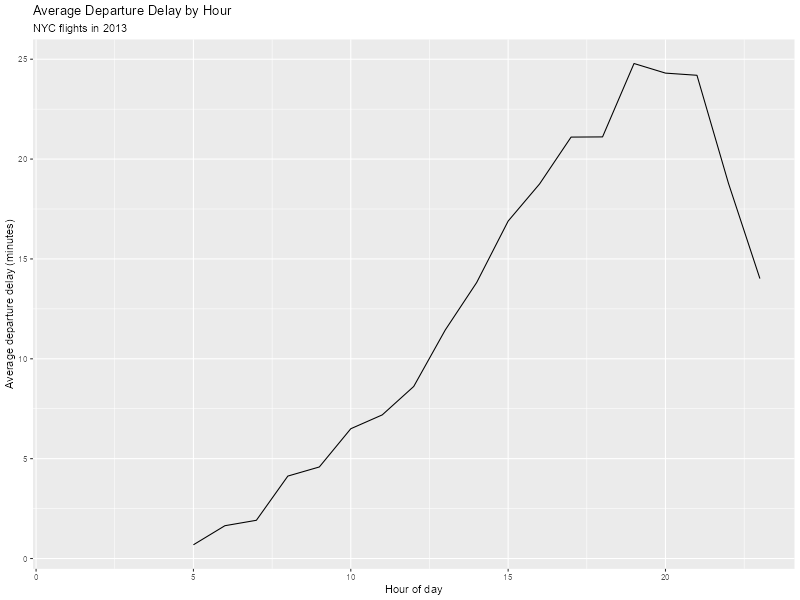

In [74]:
#Compute average departure delay by departure hour and plot.
avg_dep_delay_by_hour <- flights %>%
  mutate(hour_of_day = hour(departure)) %>%  
  group_by(hour_of_day) %>%
  summarise(
    avg_dep_delay = mean(dep_delay, na.rm = TRUE)
  )

avg_dep_delay_by_hour %>%
  ggplot(aes(x = hour_of_day, y = avg_dep_delay)) +
  geom_line() +
  labs(
    title = "Average Departure Delay by Hour",
    subtitle = "NYC flights in 2013",
    x = "Hour of day",
    y = "Average departure delay (minutes)"
  )

HOMEWORK – TASK 1: FIX ARRIVAL DELAYS

Treat strongly negative delays as potentially problematic and shift them

In [75]:
#Define a fixed arrival delay (arr_delay_fixed).

flights <- flights %>%
  mutate(
    arr_delay_fixed = if_else(
      arr_delay < -60,             
      arr_delay + 1440,            
      arr_delay
    )
  )

#Comparar retrasos originales y corregidos para filas sospechosas.
flights %>%
  filter(arr_delay < -60 | arr_delay_fixed > 1000) %>%  # filters extremes
  select(year, month, day, dep_time, arr_time, arr_delay, arr_delay_fixed) %>%
  head()


HOMEWORK – TASK 2: PATTERNS OF ARRIVAL DELAYS BY WEEKDAY

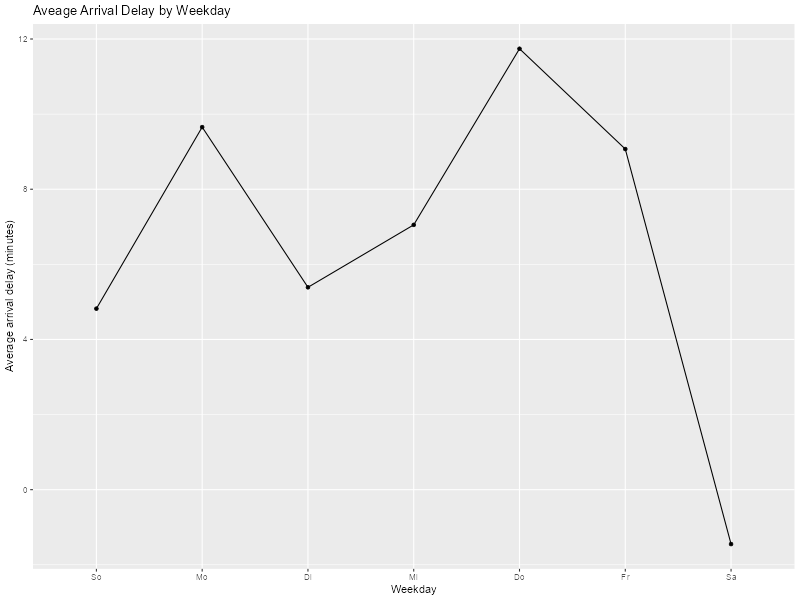

In [76]:
#Use departure or arrival time to get weekday

avg_arr_delay_by_weekday <- flights %>%
  mutate(weekday = wday(departure, label = TRUE)) %>%
  group_by(weekday) %>%
  summarise(
    avg_arr_delay = mean(arr_delay, na.rm = TRUE)
  )


avg_arr_delay_by_weekday %>%
  ggplot(aes(x = weekday, y = avg_arr_delay, group = 1)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Aveage Arrival Delay by Weekday",
    x = "Weekday",
    y = "Average arrival delay (minutes)"
  )


HOMEWORK – TASK 3: PLANES, AGE, AND DELAYS

In [77]:
# Checking that planes dataset has tailnum and year
print(head(planes))

# A tibble: 6 × 9
  tailnum  year type               manufacturer model engines seats speed engine
  <chr>   <int> <chr>              <chr>        <chr>   <int> <int> <int> <chr> 
1 N10156   2004 Fixed wing multi … EMBRAER      EMB-…       2    55    NA Turbo…
2 N102UW   1998 Fixed wing multi … AIRBUS INDU… A320…       2   182    NA Turbo…
3 N103US   1999 Fixed wing multi … AIRBUS INDU… A320…       2   182    NA Turbo…
4 N104UW   1999 Fixed wing multi … AIRBUS INDU… A320…       2   182    NA Turbo…
5 N10575   2002 Fixed wing multi … EMBRAER      EMB-…       2    55    NA Turbo…
6 N105UW   1999 Fixed wing multi … AIRBUS INDU… A320…       2   182    NA Turbo…


In [78]:
#Joining flights with planes using tailnum

flights_planes <- flights %>%
  left_join(planes, by = "tailnum", suffix = c("_flight", "_plane"))

In [79]:
#Compute plane age: reference year 2013, the flights year
flights_planes <- flights_planes %>%
  mutate(
    plane_age = if_else(
      is.na(year_plane),
      NA_real_,                 
      2013 - year_plane         
    )
  )

In [80]:
#Summarise average arrival delay by plane age group

flights_planes_age_summary <- flights_planes %>%
  mutate(
    age_group = case_when(
      is.na(plane_age)          ~ "Unknown",
      plane_age < 5             ~ "< 5 years",
      plane_age >= 5 & plane_age < 15 ~ "5–14 years",
      plane_age >= 15           ~ ">= 15 years"
    )
  ) %>%
  group_by(age_group) %>%
  summarise(
    avg_arr_delay = mean(arr_delay, na.rm = TRUE),
    n_flights     = n()
  ) %>%
  arrange(age_group)

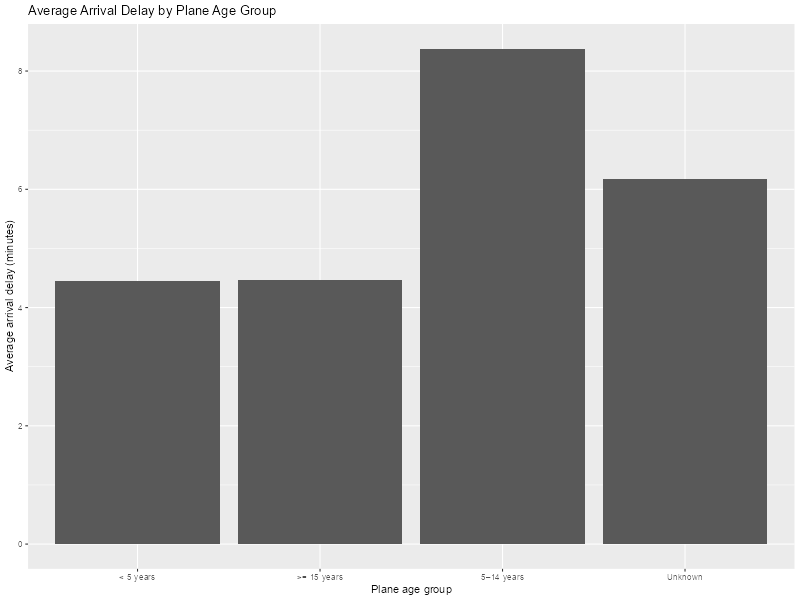

In [81]:
#Bar Plot average arrival delay by plane age group.
flights_planes_age_summary %>%
  ggplot(aes(x = age_group, y = avg_arr_delay)) +
  geom_col() +
  labs(
    title = "Average Arrival Delay by Plane Age Group",
    x = "Plane age group",
    y = "Average arrival delay (minutes)"
  )

WEEK 4 – TIME SERIES AND LINEAR MODELS

In [82]:
#Intalling needed packages
install.packages("tidyquant")
install.packages("skimr")      # package for skim() summaries
install.packages("ISLR2")


Installing package into ‘C:/Users/jlcor/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/tidyquant_1.0.11.zip'
Content type 'application/zip' length 1167307 bytes (1.1 MB)
downloaded 1.1 MB



package ‘tidyquant’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jlcor\AppData\Local\Temp\RtmpgLVaHp\downloaded_packages
Installing package into ‘C:/Users/jlcor/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/skimr_2.2.1.zip'
Content type 'application/zip' length 1188813 bytes (1.1 MB)
downloaded 1.1 MB



package ‘skimr’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jlcor\AppData\Local\Temp\RtmpgLVaHp\downloaded_packages
Installing package into ‘C:/Users/jlcor/AppData/Local/R/win-library/4.5’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/ISLR2_1.3-2.zip'
Content type 'application/zip' length 4175477 bytes (4.0 MB)
downloaded 4.0 MB



package ‘ISLR2’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jlcor\AppData\Local\Temp\RtmpgLVaHp\downloaded_packages


In [83]:
#Loading needed libraries
library(tidyquant)
library(skimr)     # skim() function for data overview
library(ISLR2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching core tidyquant packages ─────────────────────── tidyquant 1.0.11 ──
✔ PerformanceAnalytics 2.0.8      ✔ TTR                  0.24.4
✔ quantmod             0.4.28     ✔ xts                  0.14.1
── Conflicts ────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()         masks base::as.Date.numeric()
✖ dplyr::filter()                masks stats::filter()
✖ xts::first()                   masks dplyr::first()
✖ dplyr::lag()                   masks stats::lag()
✖ xts::last()                    masks dplyr::last()
✖ PerformanceAnalytics::legend() masks graphics::legend()
✖ quantmod::summary()            masks base::summary()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


Warning messages:
1: package ‘tidyquant’ was built under R version 4.5.2 
2: package ‘xts’ was built under R version 4.5.2 
3: package ‘zoo’ was built under R version 4.5.2 
4: package ‘quantmod’ was built under R version 4.5.2 
5: package ‘TTR’ was built under R version 4.5.2 
6: package ‘PerformanceAnalytics’ was built under R version 4.5.2 
Warning message:
package ‘skimr’ was built under R version 4.5.2 
Warning message:
package ‘ISLR2’ was built under R version 4.5.2 


APPLIED TIME SERIES ANALYSIS WITH tidyquant

GETTING FINANCIAL DATA

In [84]:
#GETTING FINANCIAL DATA

#Retrieve VW stock data from Yahoo Finance (VOW3.DE) from 2000 to 2025
vwa_data <- tq_get("VOW3.DE",
                   from = "2000-01-01",
                   to   = "2025-01-01")

# Preview of the time series dataset
head(vwa_data)
glimpse(vwa_data)


Rows: 6,391
Columns: 8
$ symbol   <chr> "VOW3.DE", "VOW3.DE", "VOW3.DE", "VOW3.DE", "VOW3.DE", "VOW3.…
$ date     <date> 2000-01-03, 2000-01-04, 2000-01-05, 2000-01-06, 2000-01-07, …
$ open     <dbl> 32.60389, 31.54029, 29.32362, 30.31764, 30.97369, 31.80867, 3…
$ high     <dbl> 32.60389, 31.54029, 30.36734, 30.94387, 31.80867, 32.30568, 3…
$ low      <dbl> 30.61584, 29.62182, 29.05523, 29.82063, 30.81465, 31.41106, 3…
$ close    <dbl> 31.21226, 29.82063, 30.01943, 30.66555, 31.44088, 31.65957, 3…
$ volume   <dbl> 186288, 124950, 165920, 148235, 103079, 162460, 339647, 15276…
$ adjusted <dbl> 10.754248, 10.274758, 10.343256, 10.565878, 10.833019, 10.908…


DATA OVERVIEW WITH skim

In [85]:
#DATA OVERVIEW WITH skim
# Skim is used to get summary statistics and missing value info

skim(vwa_data)


PLOTTING TIME SERIES DATA

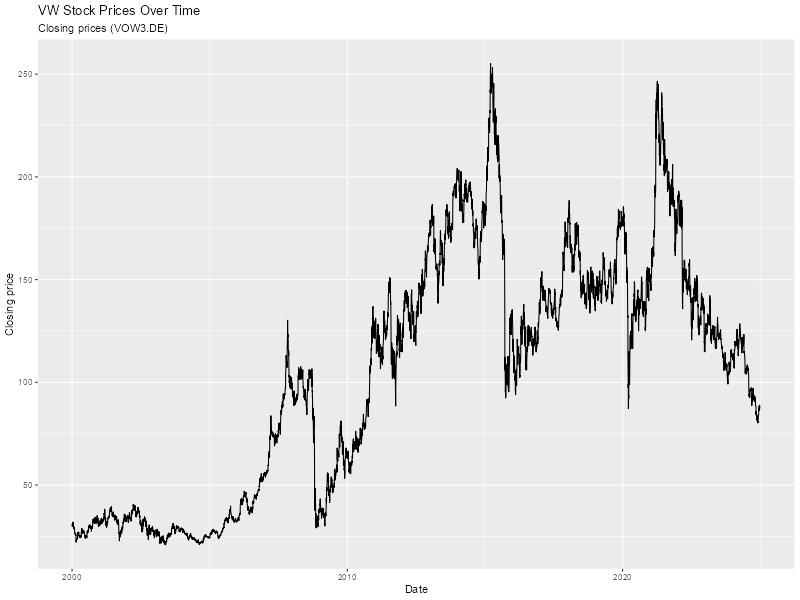

In [86]:
# Line plot of closing price over time

vwa_data %>%
  ggplot(aes(x = date, y = close)) +
  geom_line() +
  labs(
    title    = "VW Stock Prices Over Time",
    subtitle = "Closing prices (VOW3.DE)",
    x        = "Date",
    y        = "Closing price"
  )


MOVING AVERAGES

In [87]:
#Compute 30-day simple moving average (SMA) of closing price 
#Spanish: Calcular media móvil simple de 30 días del precio de cierre 
vwa_data <- vwa_data %>%
  tq_mutate(
    select      = close,
    mutate_fun  = SMA,    #Simple Moving Average/ Media Móvil Simple
    n           = 30,
    col_rename  = "SMA_30"
  )


Warning message:
Removed 29 rows containing missing values or values outside the scale range
(`geom_line()`). 


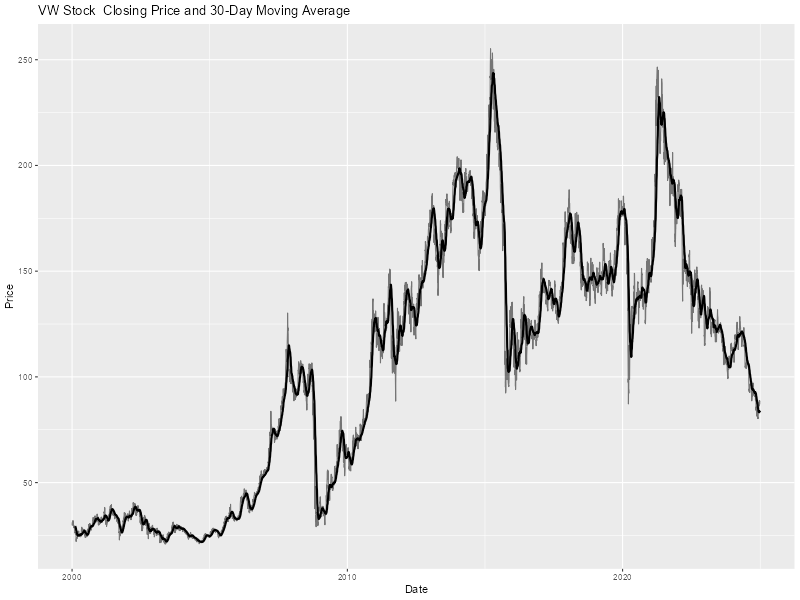

In [88]:
# PLoting last codeClosing Price and 30-Day Moving Average
vwa_data %>%
  ggplot(aes(x = date)) +
  geom_line(aes(y = close), alpha = 0.5) +
  geom_line(aes(y = SMA_30), linewidth = 1) +
  labs(
    title    = "VW Stock  Closing Price and 30-Day Moving Average",
    x        = "Date",
    y        = "Price"
  )


HANDLING MISSING DATA 

In [89]:
# Fill missing close with last known value "Downrad"
# Se llena el valor faltante con el valor de abajo
vwa_data_filled <- vwa_data %>%
  tidyr::fill(close, .direction = "down")

In [90]:
#Fill now with upward value

vwa_data_filled_both <- vwa_data %>%
  tidyr::fill(close, .direction = "downup")

In [91]:
#Checking how many NAs remain.
sum(is.na(vwa_data$close))
sum(is.na(vwa_data_filled$close))
sum(is.na(vwa_data_filled_both$close))
#Checking as Data sed
na_summary <- data.frame(
  dataset = c("vwa_data", "vwa_data_filled", "vwa_data_filled_both"),
  NAs_close = c(
    sum(is.na(vwa_data$close)),
    sum(is.na(vwa_data_filled$close)),
    sum(is.na(vwa_data_filled_both$close))
  )
)

print(na_summary)


               dataset NAs_close
1             vwa_data         0
2      vwa_data_filled         0
3 vwa_data_filled_both         0


TIME SHIFTS: LEAD & LAG

In [92]:
# Create lead next day's close and lag previous day's close

vwa_data <- vwa_data %>%
  mutate(
    close_lag1  = lag(close, 1),   
    close_lead1 = lead(close, 1)  
  )

head(vwa_data %>% select(date, close, close_lag1, close_lead1))

# A tibble: 6 × 4
  date       close close_lag1 close_lead1
  <date>     <dbl>      <dbl>       <dbl>
1 2000-01-03  31.2       NA          29.8
2 2000-01-04  29.8       31.2        30.0
3 2000-01-05  30.0       29.8        30.7
4 2000-01-06  30.7       30.0        31.4
5 2000-01-07  31.4       30.7        31.7
6 2000-01-10  31.7       31.4        32.0

BASIC FINANCIAL METRIC: ROI

In [93]:
# Compute daily return "ROI" using previous day's close

vwa_data <- vwa_data %>%
  mutate(
    ROI = (close - lag(close)) / lag(close)
    # ROI = cambio porcentual
  )

head(vwa_data %>% select(date, close, ROI))

# A tibble: 6 × 3
  date       close      ROI
  <date>     <dbl>    <dbl>
1 2000-01-03  31.2 NA      
2 2000-01-04  29.8 -0.0446 
3 2000-01-05  30.0  0.00667
4 2000-01-06  30.7  0.0215 
5 2000-01-07  31.4  0.0253 
6 2000-01-10  31.7  0.00696

LINEAR MODELS WITH Hitters

EXPLORING THE Hitters DATASET

In [94]:
#Load the Hitters dataset (baseball players).
data("Hitters")
head(Hitters)
str(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

In [95]:
#Remove rows with missing Data

hitters_clean <- na.omit(Hitters)


In [96]:
# Checking cleaned
summary(hitters_clean$Salary)
sum(is.na(hitters_clean$Salary))

[1] 0

EXPLORATORY DATA ANALYSIS: SALARY DISTRIBUTION

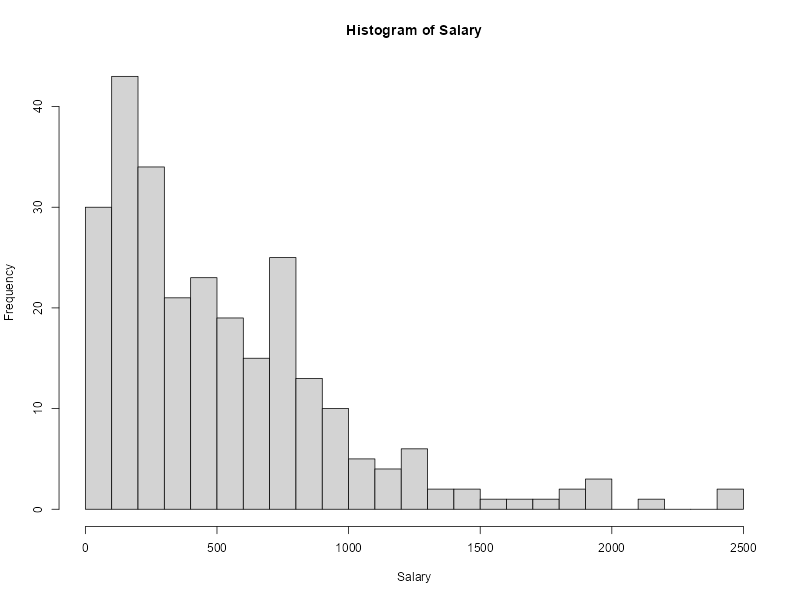

In [97]:
#Simple histogram to inspect skewness of Salary
hist(hitters_clean$Salary,
     main = "Histogram of Salary",
     xlab = "Salary",
     breaks = 20)

LINEAR REGRESSION MODEL

Build a linear model: Salary ~ HomeRuns + Runs + Years

In [98]:
#Build a linear model: Salary ~ HomeRuns + Runs + Years
model1 <- lm(Salary ~ HmRun + Runs + Years, data = hitters_clean)
#Show summary with coefficients, p-values, and adjusted R-squared
summary(model1)


Call:
lm(formula = Salary ~ HmRun + Runs + Years, data = hitters_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-694.11 -197.59  -45.92  105.56 2201.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -149.209     64.596  -2.310   0.0217 *  
HmRun          2.540      3.388   0.750   0.4540    
Runs           6.951      1.154   6.022 5.87e-09 ***
Years         37.622      4.801   7.836 1.21e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 368 on 259 degrees of freedom
Multiple R-squared:  0.3423,	Adjusted R-squared:  0.3347 
F-statistic: 44.93 on 3 and 259 DF,  p-value: < 2.2e-16


INTERPRETATION & HYPOTHESIS TESTING

In [100]:
# Extract coeficients and p-values for closer inspection
coef(model1)        # tamaño del efecto estimado
summary(model1)$coef  # incluye error estándar, t, p-valor

               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) -149.208718  64.596485 -2.3098582 2.168275e-02
HmRun          2.540424   3.387957  0.7498393 4.540321e-01
Runs           6.950961   1.154243  6.0220974 5.872261e-09
Years         37.621907   4.801447  7.8355350 1.210035e-13

In [101]:
#Adjusted R-squared 
#R al cuadrado ajustado muestra qué tan bien ajusta el modelo, ajustando por predictores
summary(model1)$adj.r.squared


MODEL DIAGNOSTICS

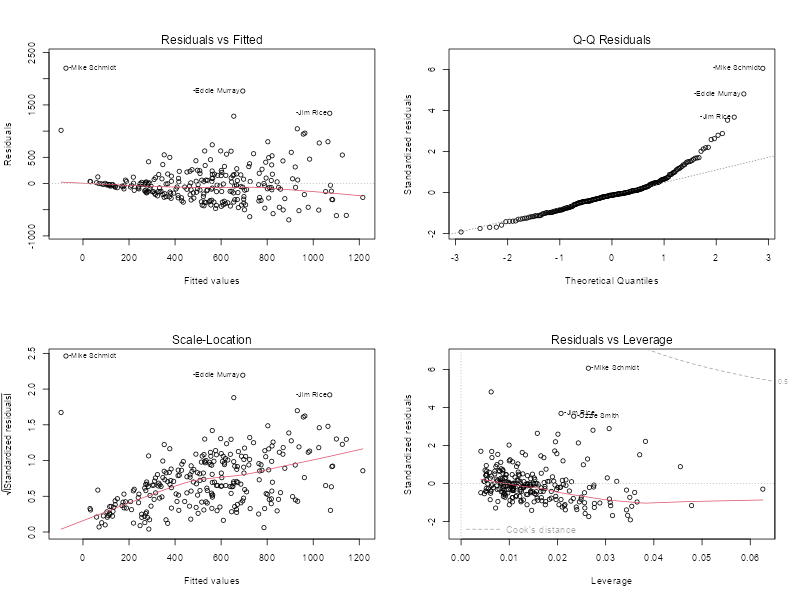

In [103]:
# Diagnostic plots – check linearity, homoscedasticity, normality, outliers
# linealidad, homocedasticidad, normalidad
par(mfrow = c(2, 2)) # 2,2 es la talla del grafico
plot(model1)
par(mfrow = c(1, 1))

TRANSFORMATIONS

In [105]:
# log-transformed model using log1p() to handle zeros safely.
#  log1p() permite manejar ceros de forma segura.
model2 <- lm(
  log1p(Salary) ~ log1p(HmRun) + log1p(Runs) + log1p(Years),
  data = hitters_clean
)

summary(model2)


Call:
lm(formula = log1p(Salary) ~ log1p(HmRun) + log1p(Runs) + log1p(Years), 
    data = hitters_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6817 -0.4026 -0.0314  0.3769  3.9534 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.75248    0.29410   9.359  < 2e-16 ***
log1p(HmRun)  0.10632    0.05681   1.871  0.06241 .  
log1p(Runs)   0.32074    0.08211   3.906  0.00012 ***
log1p(Years)  0.87126    0.06535  13.332  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6367 on 259 degrees of freedom
Multiple R-squared:  0.4893,	Adjusted R-squared:  0.4834 
F-statistic: 82.73 on 3 and 259 DF,  p-value: < 2.2e-16


In [106]:
# Compare adjusted R-squared of model1 vs model2
summary(model1)$adj.r.squared
summary(model2)$adj.r.squared

[1] 0.4834213

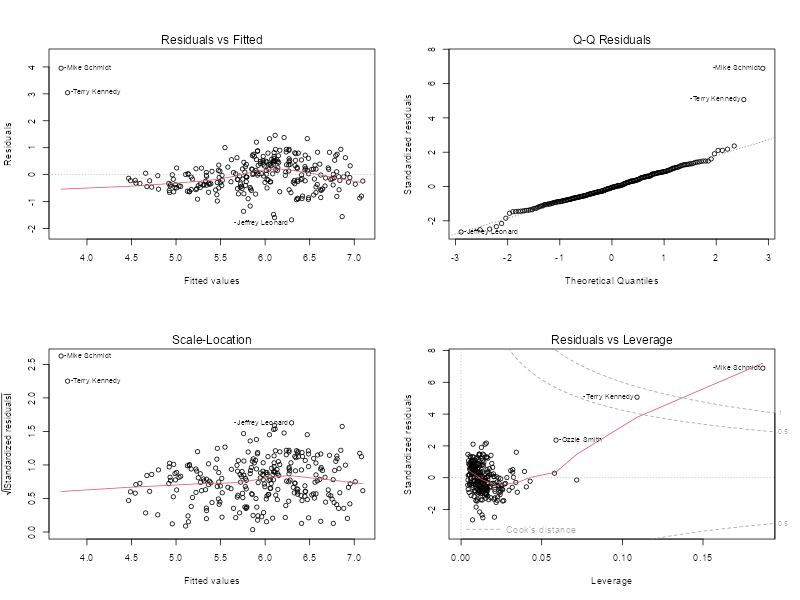

In [107]:
# Plots for transformed model
par(mfrow = c(2, 2))
plot(model2)
par(mfrow = c(1, 1))

HOMEWORK 1:  TIME SERIES PRACTICE

In [110]:
# EUsing AAPL ticker

my_ticker <- "AAPL"

my_stock <- tq_get(my_ticker,
                   from = "2015-01-01",
                   to   = "2025-01-01")
head(my_stock)

# A tibble: 6 × 8
  symbol date        open  high   low close    volume adjusted
  <chr>  <date>     <dbl> <dbl> <dbl> <dbl>     <dbl>    <dbl>
1 AAPL   2015-01-02  27.8  27.9  26.8  27.3 212818400     24.2
2 AAPL   2015-01-05  27.1  27.2  26.4  26.6 257142000     23.6
3 AAPL   2015-01-06  26.6  26.9  26.2  26.6 263188400     23.6
4 AAPL   2015-01-07  26.8  27.0  26.7  26.9 160423600     23.9
5 AAPL   2015-01-08  27.3  28.0  27.2  28.0 237458000     24.8
6 AAPL   2015-01-09  28.2  28.3  27.6  28.0 214798000     24.8

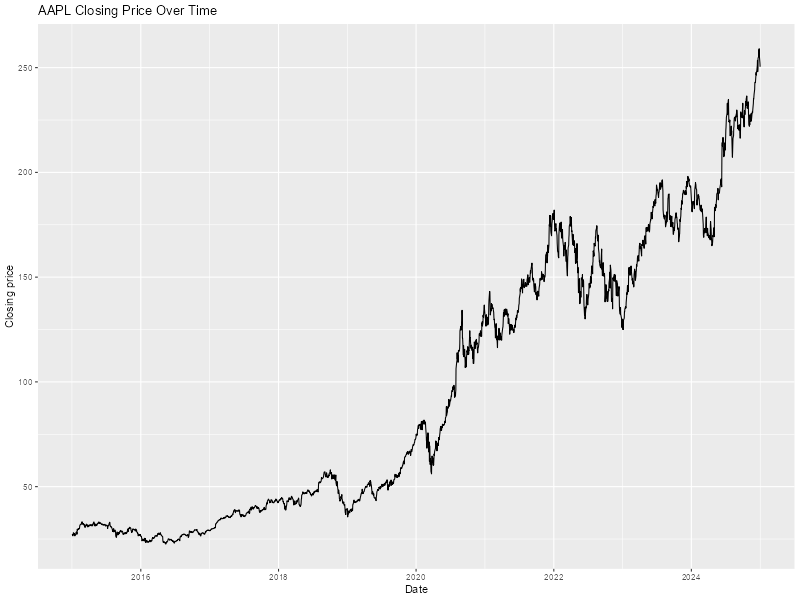

In [112]:
#Plot closing price
my_stock %>%
  ggplot(aes(x = date, y = close)) +
  geom_line() +
  labs(
    title = paste(my_ticker, "Closing Price Over Time"),
    x     = "Date",
    y     = "Closing price"
  )

Warning message:
Removed 49 rows containing missing values or values outside the scale range
(`geom_line()`). 


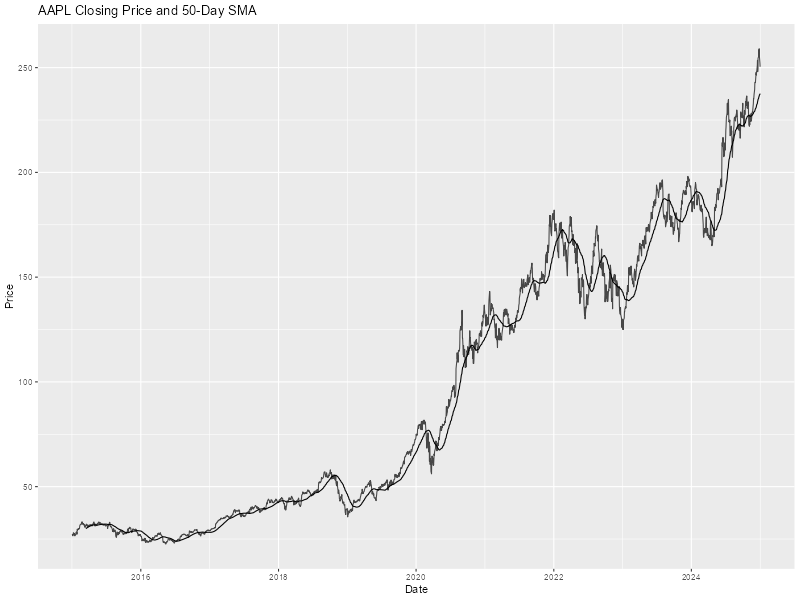

In [114]:
#Compute and plot moving average (50-day)
my_stock <- my_stock %>%
  tq_mutate(
    select     = close,
    mutate_fun = SMA,
    n          = 50,
    col_rename = "SMA_50"
  )

my_stock %>%
  ggplot(aes(x = date)) +
  geom_line(aes(y = close), alpha = 0.7) +
  geom_line(aes(y = SMA_50)) +
  labs(
    title = paste(my_ticker, "Closing Price and 50-Day SMA"),
    x     = "Date",
    y     = "Price"
  )


HOMEWORK 2: LNEAR REGRESSION PRACTICE

In [117]:
#Performance metrics regrsion
model_hw <- lm(
  Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + CAtBat + CHits,
  data = hitters_clean
)

summary(model_hw)


Call:
lm(formula = Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + 
    Years + CAtBat + CHits, data = hitters_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-951.91 -195.25  -37.87  110.90 2071.93 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.2940    84.4065   1.188 0.235859    
AtBat        -1.6315     0.6089  -2.680 0.007855 ** 
Hits          5.8106     2.2871   2.541 0.011665 *  
HmRun         2.9288     5.5639   0.526 0.599068    
Runs         -0.8218     2.5887  -0.317 0.751156    
RBI           1.8472     2.4527   0.753 0.452083    
Walks         5.2964     1.4433   3.670 0.000296 ***
Years        -9.6982    12.7120  -0.763 0.446223    
CAtBat       -0.2062     0.1204  -1.713 0.087979 .  
CHits         1.0864     0.3899   2.787 0.005727 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 333.8 on 253 degrees of freedom
Multiple R-squared:  0.4711,	Adjusted R-squared:  0.4523 
F